## Problem Statement:


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

**The company wants to know:**
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

**Goal:**

Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations

### Importing Libraries

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [332]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

## Reading & Understanding Data

In [333]:
# Read the csv and create dataframe
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows',80)
shared_bikes=pd.read_csv('day.csv')

In [334]:
# print head of dataframe
shared_bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [335]:
# check number of rows and columns of dataframe
shared_bikes.shape

(730, 16)

In [336]:
# print the information of variables 
shared_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [337]:
# Check statistical info
shared_bikes.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### Data quality check and cleaning

In [338]:
# check missing or null value percentage of each column
shared_bikes.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

so we found this dataset has no null values in any columns

In [339]:
# check for duplicate datas
shared_bikes.duplicated().value_counts()

False    730
dtype: int64

we found that no duplicate data entires are there

In [340]:
# As per data dictionary we found that instant is the index record.we can drop this column
# Also dteday is date column.since we have separate columns for yr and month we can remove this column

shared_bikes.drop(['instant','dteday'],axis=1,inplace=True)


In [341]:
#Since the 'cnt' variable indicates the total number of bike rentals, including both casual and registered .
# Also cnt is the target variable for which we need to make predictions.so we can drop casual and Registered columns
shared_bikes.drop(['casual','registered'],axis=1,inplace=True)

In [342]:
# check dataframe again
shared_bikes.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

### Checking and Correcting incorrect data 

In [343]:
# check for unknown or junk values for each column
cols=shared_bikes.columns
cols

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [344]:
for i in cols:
    print(shared_bikes[i].value_counts(),end='\n\n')

3    188
2    184
1    180
4    178
Name: season, dtype: int64

0    365
1    365
Name: yr, dtype: int64

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

0    709
1     21
Name: holiday, dtype: int64

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

1    504
0    226
Name: workingday, dtype: int64

1    463
2    246
3     21
Name: weathersit, dtype: int64

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64

32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.17435    1
Name: atemp, Length: 689, dtype: int64

61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3
          ..
54.8333    1
56.1765    1
85.0000   

it seems there are no unknown and junk values present in the dataset

### Outlier Analysis

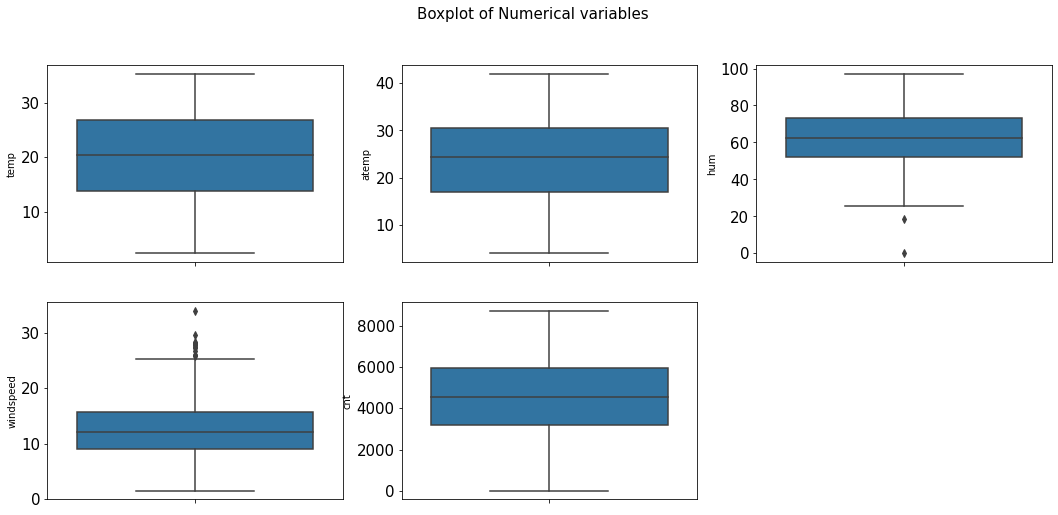

In [345]:
# Outlier analysis is carried out for continuous columns
num_cols=['temp','atemp','hum','windspeed','cnt']
plt.figure(figsize=(18,8))
pos=1
for i in num_cols:
    plt.subplot(2,3,pos)
    sns.boxplot(data=shared_bikes,y=i)
    plt.suptitle('Boxplot of Numerical variables',size=15)
    pos=pos+1

 Temp and atemp has no outliers with median around 21 and 24 respectively.windspeed has outliers but not so far from upper whisker and most of the values range between 9 and 16.Humidity has most values range between 50-75.Overall there are not much outliers present in data to deal with 

### Conversion to categorical

Variables like 'weathersit','season','weekday','mnth' have values as 1, 2, 3, 4 which have specific labels associated with them gives an intution that they are numeric variables.But from data dictionary we found that these are actually categorical variables.so changing them to categorical with specific categories according to data dictionary


In [346]:
# change dtype
shared_bikes['season'] = shared_bikes['season'].astype('category')
shared_bikes['weathersit'] = shared_bikes['weathersit'].astype('category')
shared_bikes['mnth'] = shared_bikes['mnth'].astype('category')
shared_bikes['weekday'] = shared_bikes['weekday'].astype('category')

In [347]:
#converting to categorical
shared_bikes['season']=shared_bikes.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
shared_bikes['mnth']=shared_bikes.mnth.map({1:'jan',2:'feb',3:'march',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',
                                            10:'Oct',11:'Nov',12:'Dec'})
shared_bikes['weekday']=shared_bikes.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
shared_bikes['weathersit']=shared_bikes.weathersit.map({1: 'Clear',2:'Mist',3:'Light Rain',4:'Heavy Snow/Rain'})


In [348]:
# check dataframe
shared_bikes.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     mon           1       Mist  14.110847   
1  spring   0  jan        0     tue           1       Mist  14.902598   
2  spring   0  jan        0     wed           1      Clear   8.050924   
3  spring   0  jan        0     thu           1      Clear   8.200000   
4  spring   0  jan        0     fri           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

##  Data Visualization 

### Univariate and Bivariate/Multivariate Analysis

### Numerical Variables

#### Univariate Analysis

In [349]:
def uni_num(column):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.distplot(shared_bikes[column])
    plt.title('Distplot of'+' '+column)
    plt.subplot(1,2,2)
    sns.boxplot(y=shared_bikes[column])
    plt.title('Boxplot of'+' '+column)
    plt.suptitle('Univariate Analysis of'+' '+column ,size=15)
    plt.tight_layout(pad=3)
    plt.show()

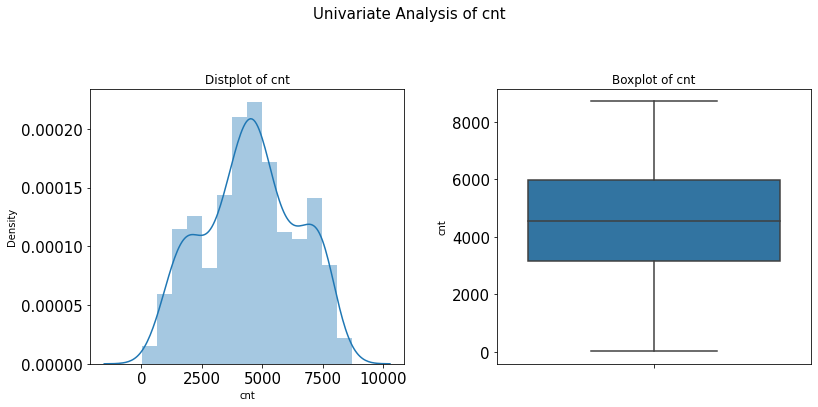

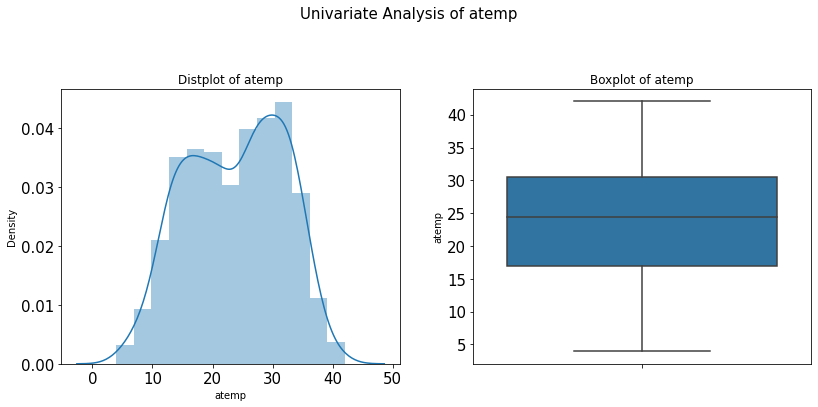

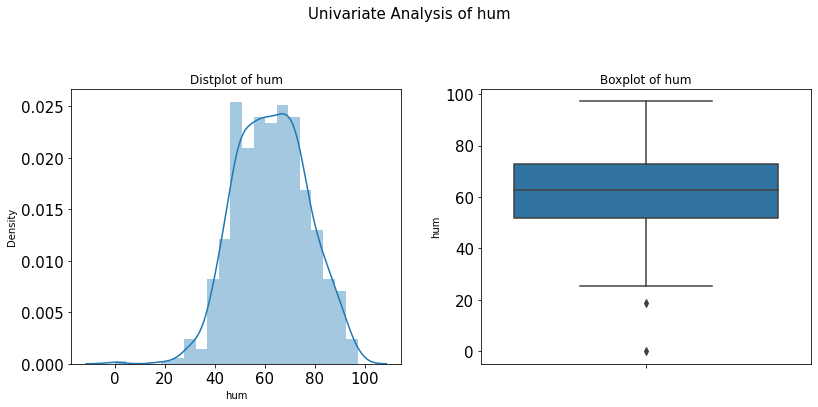

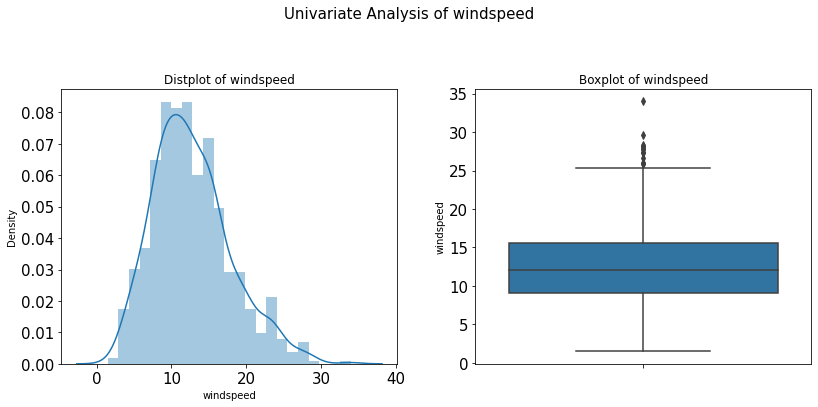

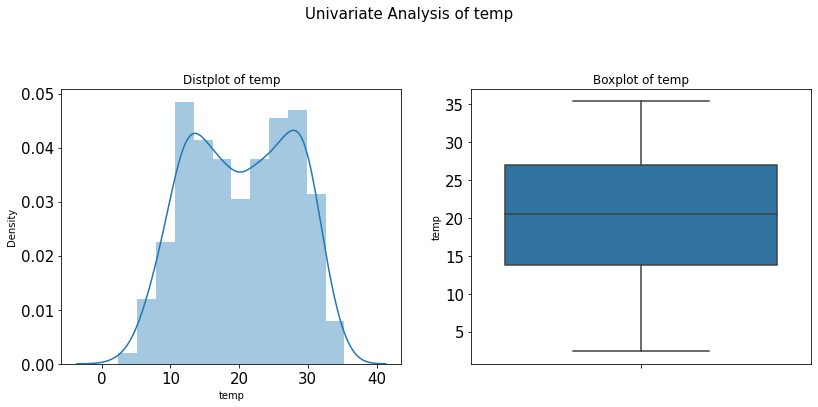

In [350]:
num_cols=['cnt','atemp','hum','windspeed','temp']
for i in num_cols:
    uni_num(i)
    plt.show()
    

**Observations:**
- rental demand cnt maximum values lies between 3000 to 6000 and median is at around 4500
- windspeed maximum values lies between 9 to 16 and median is at around 12
- humidity most of the values lies between 52 to 72 with median at 62
- temp and atemp most values lies in range of 13 to 27 with median 21 and 16 to 30 with median around 25 respectively

#### Bivariate & Multivariate Analysis

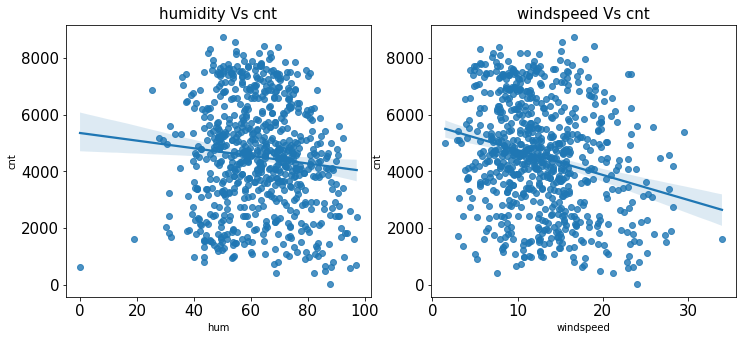

In [351]:
# check for Humidity and windspeed VS cnt
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.regplot(data=shared_bikes,x='hum',y='cnt')
plt.title('humidity Vs cnt',size=15)
plt.subplot(1,2,2)
sns.regplot(data=shared_bikes,x='windspeed',y='cnt')
plt.title('windspeed Vs cnt',size=15)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

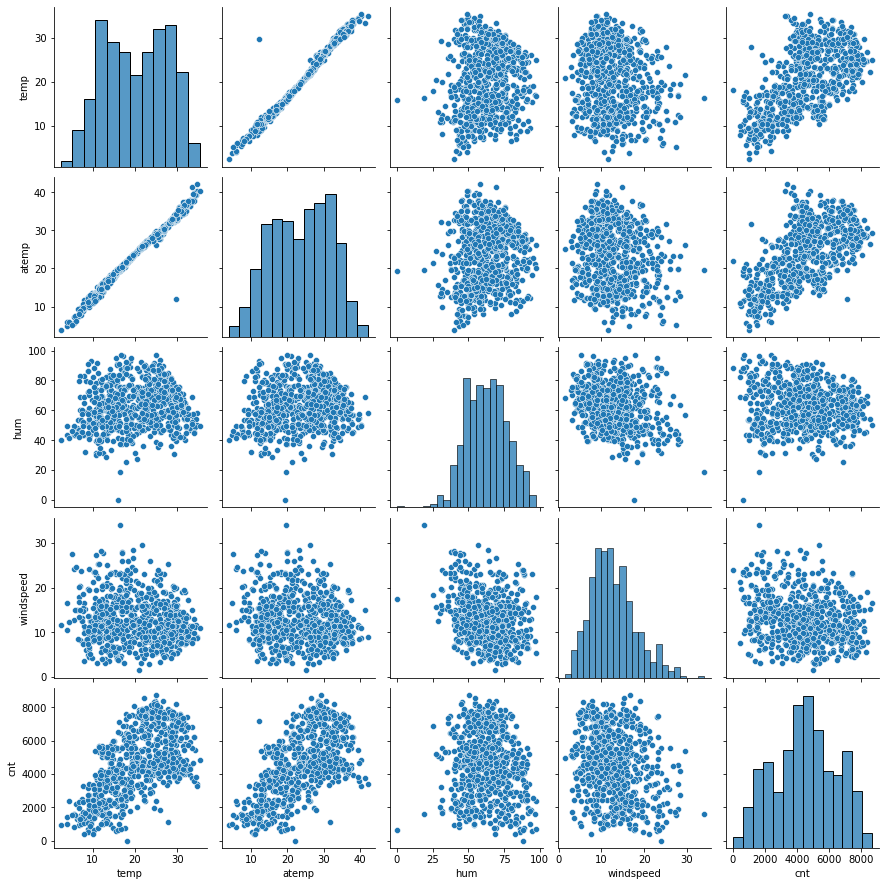

In [352]:
#Pairplot
num_cols=['temp','atemp','hum','windspeed','cnt']
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.pairplot(shared_bikes[num_cols])
plt.show

Observation:
   - There is strong positive correlation between temp & cnt and atemp and cnt
   - temp and atemp shows strong positive correlation 
   - Eventhough hum and windspeed values are scattered around,we can see both have a negative correlation with cnt.As humidity        and windspeed increases rental cnt or demand decreases

### Categorical variables

#### Univariate Analysis

In [353]:
# Define function for univariate Analysis 
def uni_var(column):
    plt.figure(figsize=(10,6))
    sns.countplot(data=shared_bikes,x=column)
    plt.title("Univariate Analysis of"+ ' '+column)
    plt.xticks(rotation=90)

In [354]:
# yr,holiday,workingday are also categorical ones 
Cat_cols=['season','yr','mnth','holiday','weekday','workingday','weathersit']

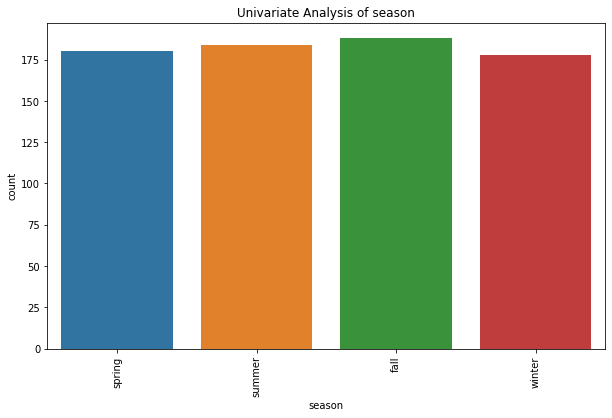

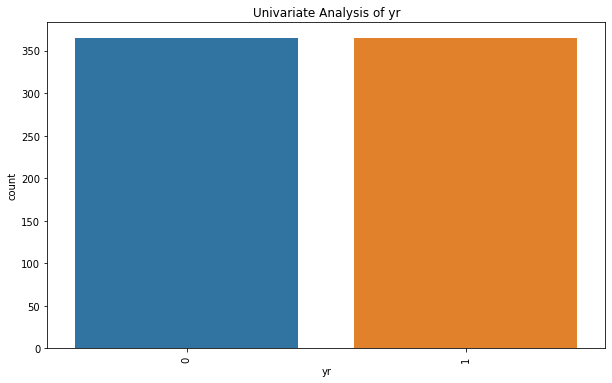

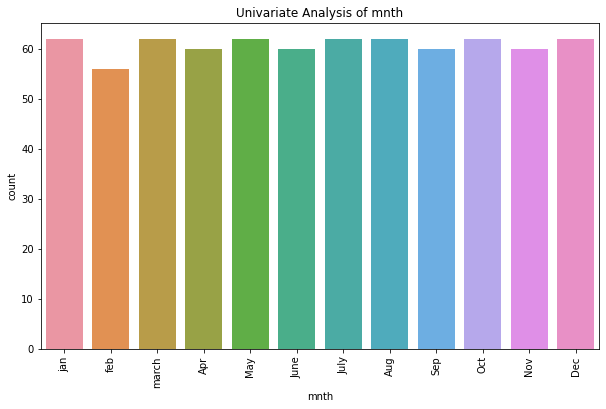

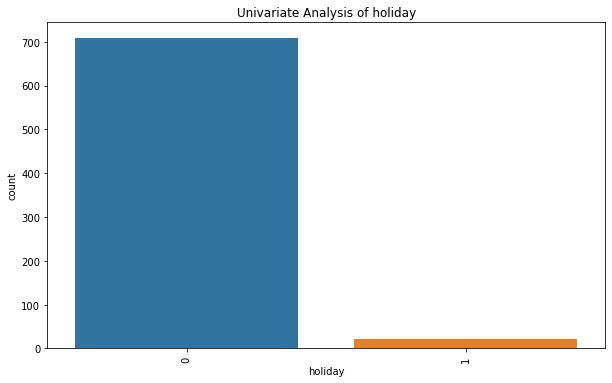

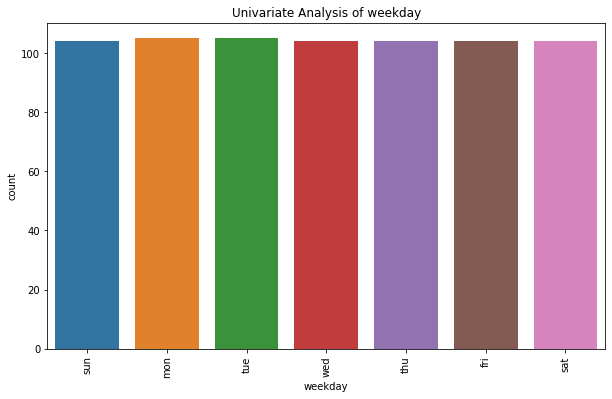

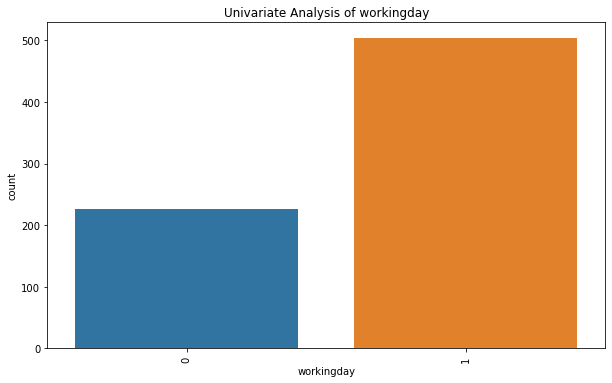

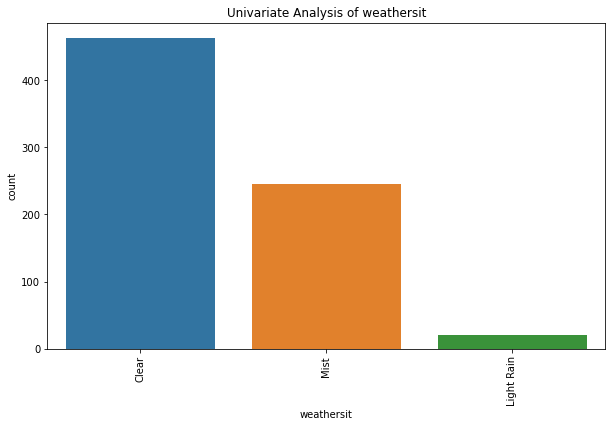

In [355]:
for i in Cat_cols:
    uni_var(i)
    plt.show()

Observations:
   - Season 'Fall' has the most bike rental count amoung all seasons
   - Lowest count is in february and this may be because of less number of days
   - Bike rental count is high during non holidays with around 90% values belongs to non holiday
   - Demand is higher during clear weather  when compared to others  

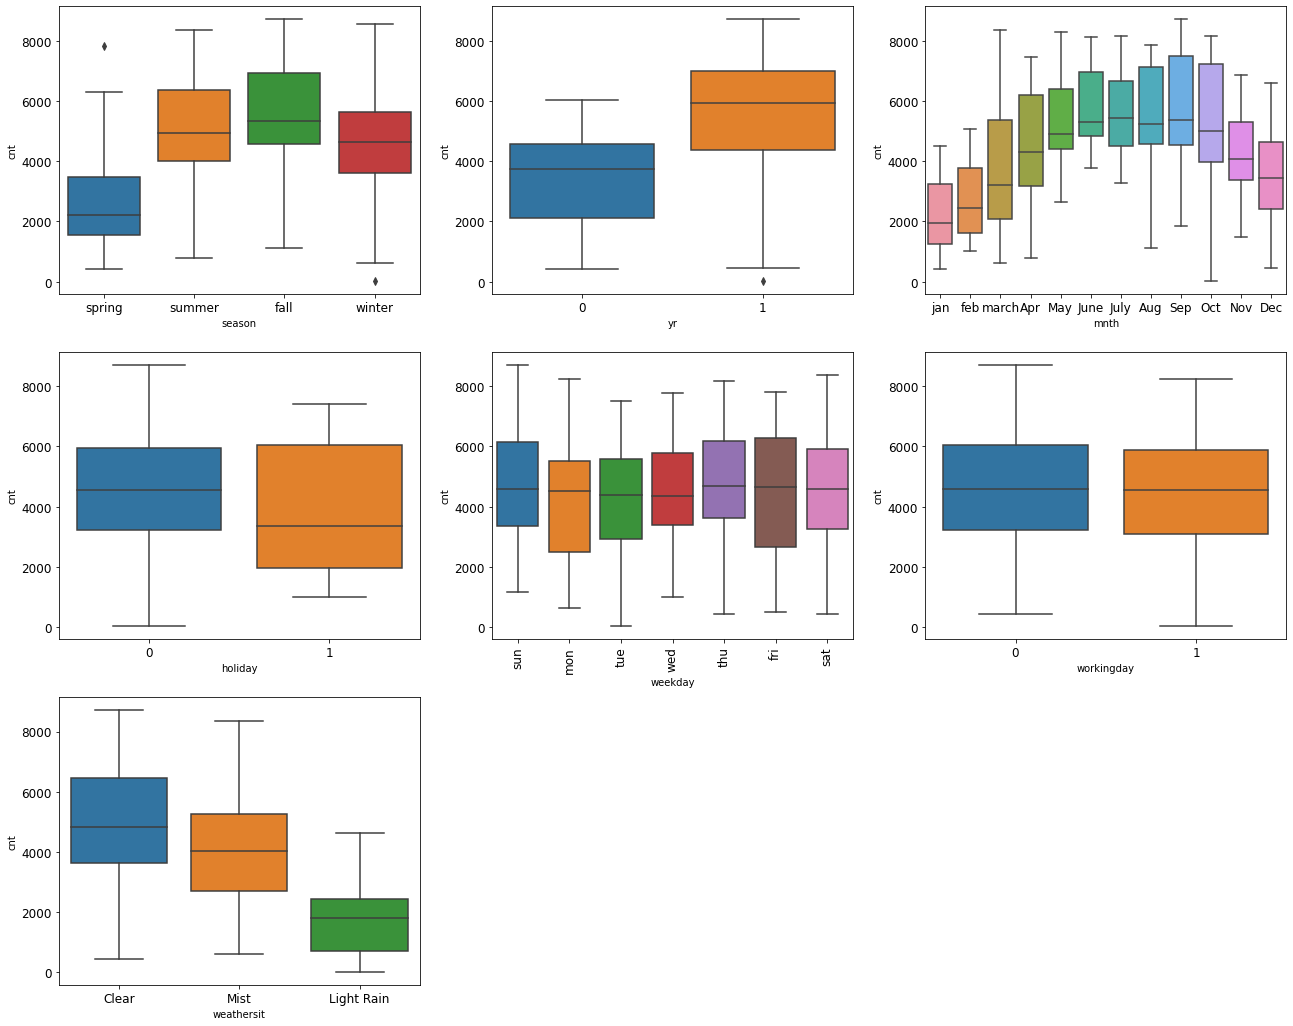

In [356]:
# Bivariate Analysis
plt.figure(figsize=(22, 18))
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = shared_bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = shared_bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = shared_bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = shared_bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday',y = 'cnt', data = shared_bikes)
plt.xticks(rotation=90)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = shared_bikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = shared_bikes)
plt.show()
     

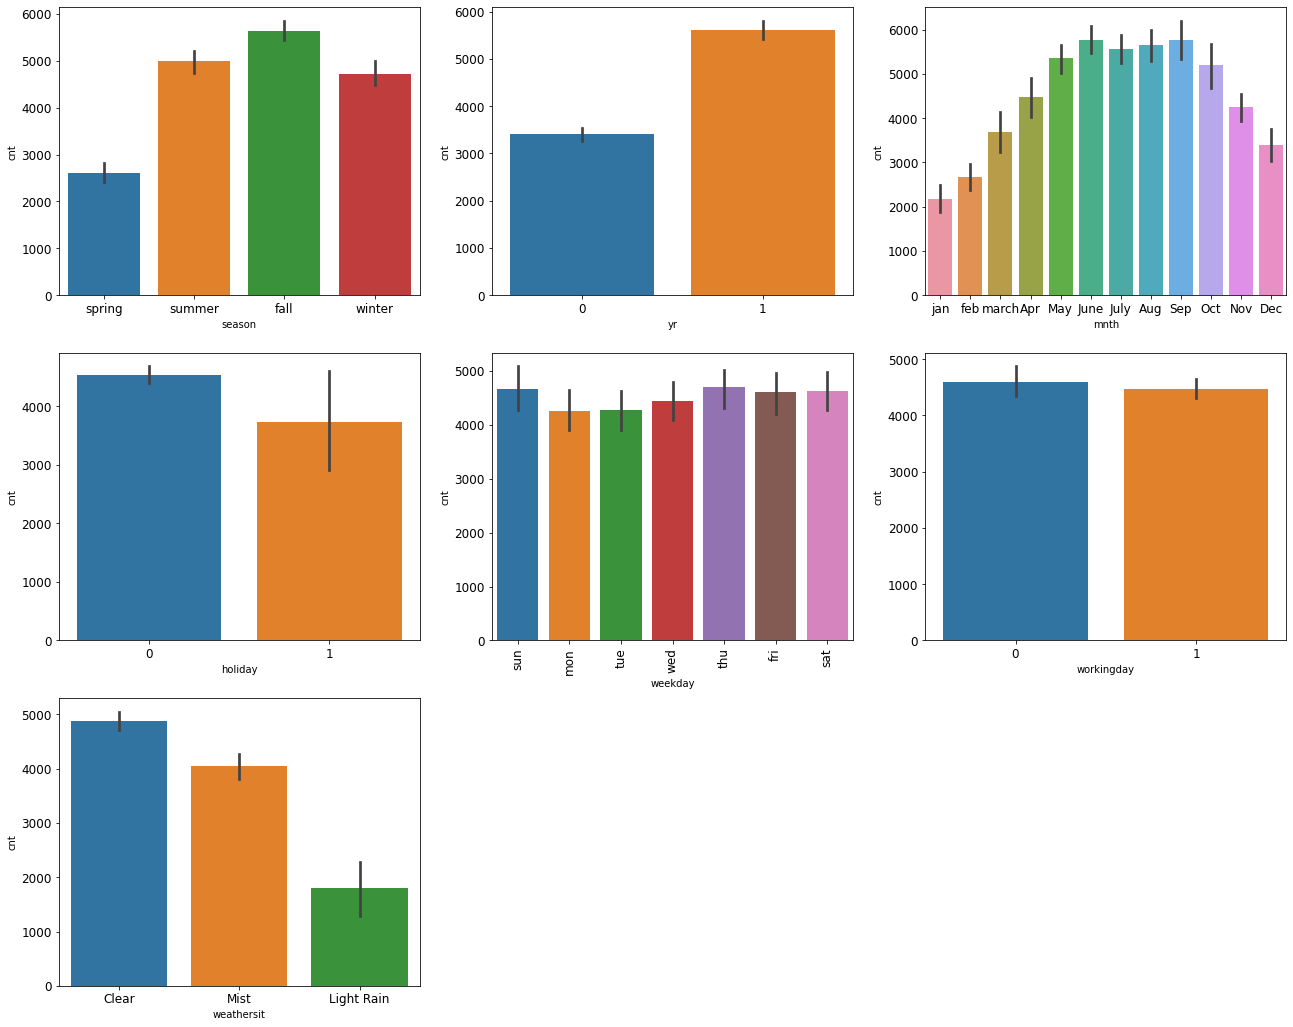

In [357]:
# Bivariate Analysis-mean value analysis
plt.figure(figsize=(22, 18))
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.subplot(3,3,1)
sns.barplot(x = 'season', y = 'cnt', data = shared_bikes)
plt.subplot(3,3,2)
sns.barplot(x = 'yr', y = 'cnt', data = shared_bikes)
plt.subplot(3,3,3)
sns.barplot(x = 'mnth', y = 'cnt', data = shared_bikes)
plt.subplot(3,3,4)
sns.barplot(x = 'holiday', y = 'cnt', data = shared_bikes)
plt.subplot(3,3,5)
sns.barplot(x = 'weekday',y = 'cnt', data = shared_bikes)
plt.xticks(rotation=90)
plt.subplot(3,3,6)
sns.barplot(x = 'workingday', y = 'cnt', data = shared_bikes)
plt.subplot(3,3,7)
sns.barplot(x = 'weathersit', y = 'cnt', data = shared_bikes)
plt.show()
     

Observations: 
   - Fall is the busiest season for renting bicycles.Summer and winter also have good rental reservations.
   - we can see demand increases year by year
   - Up until June, demand will keep increasing month after month. The largest demand occurs in September.
      After that demand decreases.
   - Demand is high for non holidays 
   - clear weathersit have high bookings compared to others.
   - The majority of bike rental bookings took place during "workingday."

### Correlation Analysis

<AxesSubplot:>

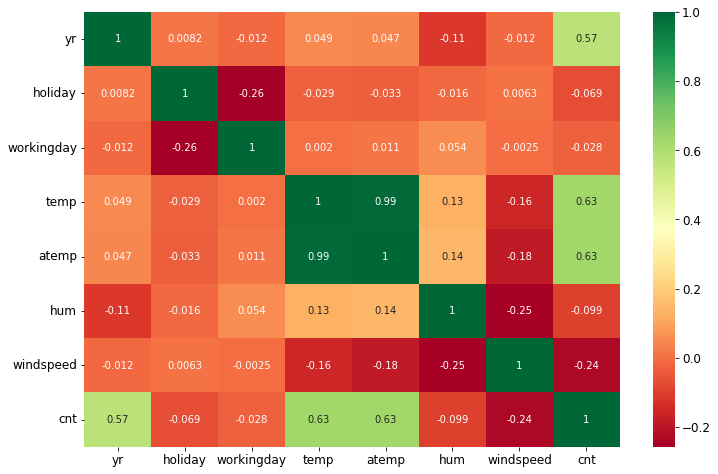

In [358]:
plt.figure(figsize=(12,8))
sns.heatmap(shared_bikes.corr(),annot=True,cmap="RdYlGn")

- we found that temp and atemp has high correlation of 0.99~=1.so they are approximately similar
- Also yr,temp and atemp has high correlation with cnt when compared to others


In [359]:
# check df again
shared_bikes.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     mon           1       Mist  14.110847   
1  spring   0  jan        0     tue           1       Mist  14.902598   
2  spring   0  jan        0     wed           1      Clear   8.050924   
3  spring   0  jan        0     thu           1      Clear   8.200000   
4  spring   0  jan        0     fri           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

### Overall from Analysis our Target variable has a linear relationship with .It is a positive indicator for creating a linear regression model

## Model Building procedure


### Model Data Preparation

In order to fit a regression line, we would need numerical values and not string. Hence, we need to convert categorical vlaues to numerical using dummy variables.

### Dummy Variables

In [360]:
# change Season,mnth,weekday,weathersit to numerical using dummy varibles
shared_bikes = pd.get_dummies(data=shared_bikes,columns=['season','mnth','weekday','weathersit'],drop_first=True)

In [361]:
shared_bikes.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_summer  season_fall  season_winter  mnth_feb  mnth_march  mnth_Apr  \
0              0            0              0         0           0         0   
1              0            0              0         0           0         0   
2              0            0              0         0           0         0   
3              0            0              0         0           0         0   
4              0            0              0         0           0         0   

   mnth_May  mnth_June  mnth_July  mnth_Aug  mnth_Sep  mnth_Oct  mnth_Nov  \
0         0          0          0         0         0         0         0   
1         0          0          0         0         0         0         0   
2         0          0          0         0         0         0         0   
3         0          0          0         0         0         0         0   
4         0          0          0         0         0         0         0   

   mnth_Dec  weekday_mon  weekday_tue  weekday_wed  weekday_thu  weekday_fri  \
0         0            1            0            0            0            0   
1         0            0            1            0            0            0   
2         0            0            0            1            0            0   
3         0            0            0            0            1            0   
4         0            0            0            0            0            1   

   weekday_sat  weathersit_Mist  weathersit_Light Rain  
0            0                1                      0  
1            0                1                      0  
2            0                0                      0  
3            0                0                      0  
4            0                0                      0

In [362]:
# check shape now
shared_bikes.shape

(730, 30)

In [363]:
# check df info
shared_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_summer          730 non-null    uint8  
 9   season_fall            730 non-null    uint8  
 10  season_winter          730 non-null    uint8  
 11  mnth_feb               730 non-null    uint8  
 12  mnth_march             730 non-null    uint8  
 13  mnth_Apr               730 non-null    uint8  
 14  mnth_May               730 non-null    uint8  
 15  mnth_J

### Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [364]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(shared_bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [365]:
# Lets verify the shape of test and train data
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the Features

it is extremely important to rescale the variables so that they have a comparable scale

In [366]:
# import mimmax scaler from sklearn
from sklearn.preprocessing import MinMaxScaler

In [367]:
scaler = MinMaxScaler()

In [368]:
# Apply scaler() to all continuous columns
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [369]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  season_summer  season_fall  season_winter  mnth_feb  \
653  0.864243              0            0              1         0   
576  0.827658              0            1              0         0   
426  0.465255              0            0              0         0   
728  0.204096              0            0              0         0   
482  0.482973              1            0              0         0   

     mnth_march  mnth_Apr  mnth_May  mnth_June  mnth_July  mnth_Aug  mnth_Sep  \
653           0         0         0          0          0         0         0   
576           0         0         0          0          1         0         0   
426           1         0         0          0          0         0         0   
728           0         0         0          0          0         0         0   
482           0         1         0          0          0         0         0   

     mnth_Oct  mnth_Nov  mnth_Dec  weekday_mon  weekday_tue  weekday_wed  \
653         1         0         0            0            0            1   
576         0         0         0            0            0            1   
426         0         0         0            0            0            0   
728         0         0         1            1            0            0   
482         0         0         0            0            0            0   

     weekday_thu  weekday_fri  weekday_sat  weathersit_Mist  \
653            0            0            0                0   
576            0            0            0                0   
426            0            0            0                1   
728            0            0            0                0   
482            0            0            0                1   

     weathersit_Light Rain  
653                      0  
576                      0  
426                      0  
728                      0  
482                      0

In [370]:
# check whether all values lies within 0 and 1
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.453386    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt  season_summer  season_fall  season_winter  \
count  510.000000  510.000000     510.000000   510.000000      510.00000   
mean     0.320768    0.513620       0.245098     0.262745        0.24902   
std      0.169797    0.224593       0.430568     0.440557        0.43287   
min      0.000000    0.000000       0.000000     0.000000        0.00000   
25%      0.199179    0.356420       0.000000     0.000000        0.00000   
50%      0.296763    0.518638       0.000000     0.000000        0.00000   
75%      0.414447    0.684710       0.000000     1.000000        0.00000   
max      1.000000    1.000000       1.000000     1.000000        1.00000   

         mnth_feb  mnth_march    mnth_Apr    mnth_May   mnth_June   mnth_July  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.066667    0.098039    0.078431    0.084314    0.074510    0.076471   
std      0.249689    0.297660    0.269113    0.278131    0.262857    0.266010   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         mnth_Aug    mnth_Sep    mnth_Oct    mnth_Nov    mnth_Dec  \
count  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.096078    0.080392    0.086275    0.086275    0.084314   
std      0.294988    0.272166    0.281045    0.281045    0.278131   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       weekday_mon  weekday_tue  weekday_wed  weekday_thu  weekday_fri  \
count   510.000000   510.000000   510.000000   510.000000   510.000000   
mean      0.154902     0.152941     0.135294     0.143137     0.147059   
std       0.362166     0.360284     0.342373     0.350557     0.354512   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_sat  weathersit_Mist  weathersit_Light Rain  
count   510.000000       510.000000             510.000000  
mean      0.129412         0.343137               0.029412  
std       0.335985         0.475223               0.169124  
min       0.000000         0.000000               0.000000  
25%       0.000000         0.000000               0.000000  
50%       0.000000         0.000000               0.000000  
75%       0.000000         1.000000               0.000000  
max       1.000000         1.000000               1.000000

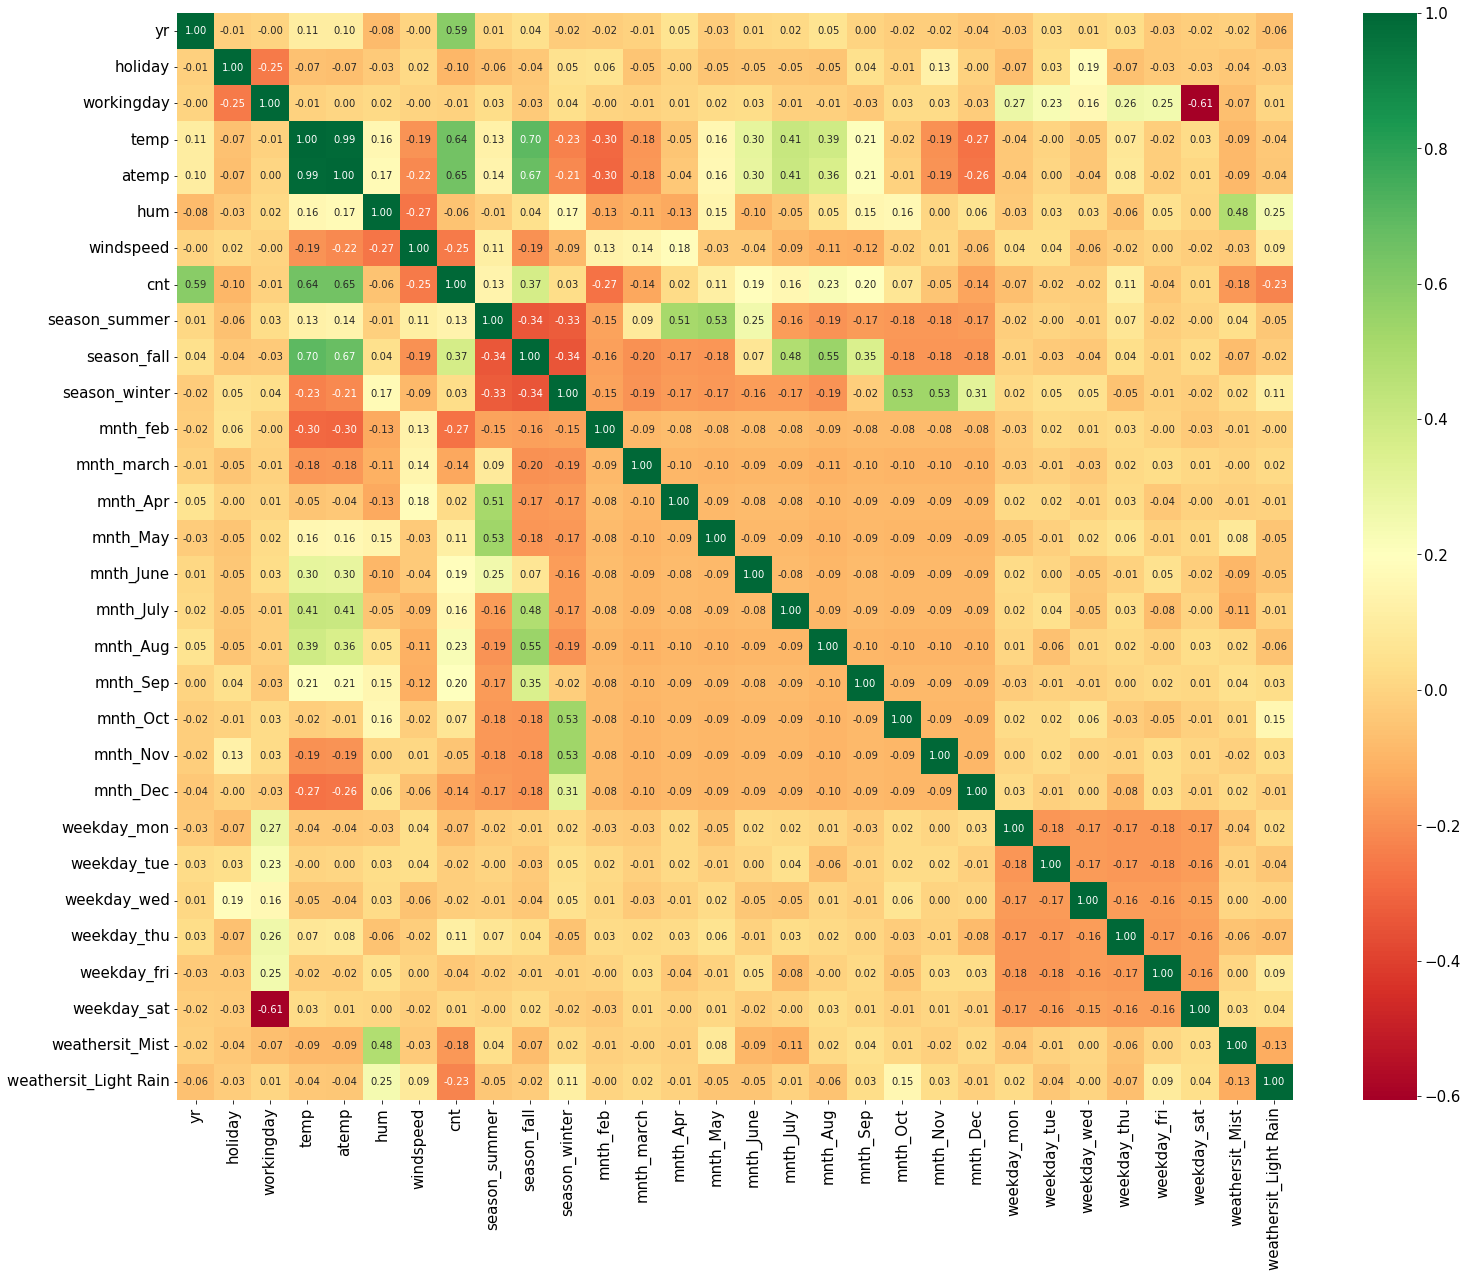

In [371]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 20))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn",fmt='.2f')
plt.show()

It seems temp seems to be correlated to cnt the most.

### Dividing into X and Y sets for the model building

In [372]:
y_train = df_train.pop('cnt')
X_train = df_train

In [373]:
# y_train is cnt
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [374]:
# X_train is all other columns except cnt
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

     season_summer  season_fall  season_winter  mnth_feb  mnth_march  \
653              0            0              1         0           0   
576              0            1              0         0           0   
426              0            0              0         0           1   
728              0            0              0         0           0   
482              1            0              0         0           0   

     mnth_Apr  mnth_May  mnth_June  mnth_July  mnth_Aug  mnth_Sep  mnth_Oct  \
653         0         0          0          0         0         0         1   
576         0         0          0          1         0         0         0   
426         0         0          0          0         0         0         0   
728         0         0          0          0         0         0         0   
482         1         0          0          0         0         0         0   

     mnth_Nov  mnth_Dec  weekday_mon  weekday_tue  weekday_wed  weekday_thu  \
653         0         0            0            0            1            0   
576         0         0            0            0            1            0   
426         0         0            0            0            0            0   
728         0         1            1            0            0            0   
482         0         0            0            0            0            0   

     weekday_fri  weekday_sat  weathersit_Mist  weathersit_Light Rain  
653            0            0                0                      0  
576            0            0                0                      0  
426            0            0                1                      0  
728            0            0                0                      0  
482            0            0                1                      0

In [375]:
# check size of X_train,y_train
print(X_train.shape)
print(y_train.shape)

(510, 29)
(510,)


### Linear Model Building

We have almost 29 independent variables.Building model with all these variables is hectic.
So we use RFE to we will use the RFE (Recursive Feature Elimination) method, which will give us a set of variables ranked in 
order of importance (influencing the result)

### RFE
Recursive feature elimination

In [376]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [377]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

In [378]:
# running RFE
rfe = RFE(lm,n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [379]:
# print choosen features and ranking
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True False  True  True  True  True  True False  True
 False  True False False  True  True  True False False False False False
 False False False  True  True]
[ 1  1  5  1  4  1  1  1  1  1 11  1  2  1  3 12  1  1  1 13 14  9 10  8
  6  7 15  1  1]


In [380]:
# for better view create a df for rfe choosen features with ranking
Choosen_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Choosen/not':rfe.support_,
                                     'Ranking':rfe.ranking_})
Choosen_rfe_features.sort_values(by='Ranking')

Feature  Choosen/not  Ranking
0                      yr         True        1
18               mnth_Oct         True        1
17               mnth_Sep         True        1
16               mnth_Aug         True        1
27        weathersit_Mist         True        1
13               mnth_May         True        1
11             mnth_march         True        1
9           season_winter         True        1
28  weathersit_Light Rain         True        1
7           season_summer         True        1
8             season_fall         True        1
3                    temp         True        1
5                     hum         True        1
1                 holiday         True        1
6               windspeed         True        1
12               mnth_Apr        False        2
14              mnth_June        False        3
4                   atemp        False        4
2              workingday        False        5
24            weekday_thu        False        6
25            weekday_fri        False        7
23            weekday_wed        False        8
21            weekday_mon        False        9
22            weekday_tue        False       10
10               mnth_feb        False       11
15              mnth_July        False       12
19               mnth_Nov        False       13
20               mnth_Dec        False       14
26            weekday_sat        False       15

In [381]:
#print selected features
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_fall', 'season_winter', 'mnth_march', 'mnth_May', 'mnth_Aug',
       'mnth_Sep', 'mnth_Oct', 'weathersit_Mist', 'weathersit_Light Rain'],
      dtype='object')

In [382]:
# not selected ones
print(X_train.columns[~rfe.support_])

Index(['workingday', 'atemp', 'mnth_feb', 'mnth_Apr', 'mnth_June', 'mnth_July',
       'mnth_Nov', 'mnth_Dec', 'weekday_mon', 'weekday_tue', 'weekday_wed',
       'weekday_thu', 'weekday_fri', 'weekday_sat'],
      dtype='object')


### Building model using statsmodel, for the detailed statistics

### MODEL 1

In [383]:
# Assign all the feature variables to X_train_rfe
X_train_rfe=X_train[cols]
# adding constant as if we don't perform this step, statsmodels fits a regression line passing through the origin, by default
X_train_sm = sm.add_constant(X_train_rfe)
# Create a first fitted model
lm1 = sm.OLS(y_train, X_train_sm).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          2.95e-189
Time:                        16:23:20   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [384]:
# check VIF for mulitcollinearity
X=X_train_rfe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
print(vif.sort_values(by = "VIF", ascending = False))

                 Features    VIF
2                    temp  24.64
3                     hum  15.55
6             season_fall   8.80
4               windspeed   3.80
5           season_summer   3.73
7           season_winter   3.13
13        weathersit_Mist   2.15
0                      yr   2.04
10               mnth_Aug   1.85
9                mnth_May   1.68
12               mnth_Oct   1.64
11               mnth_Sep   1.51
8              mnth_march   1.33
14  weathersit_Light Rain   1.19
1                 holiday   1.05


From model 1,R-squared value and Adjusted R-squared value are around 84%.But p value of mnth_May is higher than 0.05.so this variable is not significant and we need to drop it

### MODEL 2

In [385]:
# Dropping insignificant variable mnth_May
X_train_rfe=X_train_rfe.drop('mnth_May',axis=1)

In [386]:
# add constant and create 2nd model
X_train_sm = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          9.02e-190
Time:                        16:23:21   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [387]:
# check VIF
X=X_train_rfe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
print(vif.sort_values(by = "VIF", ascending = False))

                 Features    VIF
2                    temp  24.01
3                     hum  15.51
6             season_fall   8.53
4               windspeed   3.73
5           season_summer   3.51
7           season_winter   3.07
12        weathersit_Mist   2.15
0                      yr   2.03
9                mnth_Aug   1.85
11               mnth_Oct   1.64
10               mnth_Sep   1.51
8              mnth_march   1.27
13  weathersit_Light Rain   1.19
1                 holiday   1.05


As season_fall has high P value,it is insignificant so we decided to drop it

# model3

In [388]:
# drop insignificant variable season-fall
X_train_rfe=X_train_rfe.drop('season_fall',axis=1)

In [389]:
X_train_sm = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train, X_train_sm).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          2.26e-190
Time:                        16:23:21   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [390]:
# check VIF
X=X_train_rfe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
print(vif.sort_values(by = "VIF", ascending = False))

                 Features    VIF
3                     hum  14.75
2                    temp  10.01
4               windspeed   3.69
6           season_winter   2.34
11        weathersit_Mist   2.14
0                      yr   2.02
5           season_summer   1.83
8                mnth_Aug   1.61
10               mnth_Oct   1.61
9                mnth_Sep   1.34
7              mnth_march   1.22
12  weathersit_Light Rain   1.18
1                 holiday   1.04


Now we can see mnth_march has high p value so its not a significant variable

## Model 4

In [391]:
# Drop mnth_march
X_train_rfe=X_train_rfe.drop('mnth_march',axis=1)

In [392]:
X_train_sm = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train, X_train_sm).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          6.02e-191
Time:                        16:23:21   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [393]:
X=X_train_rfe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
print(vif.sort_values(by = "VIF", ascending = False))

                 Features    VIF
3                     hum  14.41
2                    temp   9.88
4               windspeed   3.59
6           season_winter   2.27
10        weathersit_Mist   2.13
0                      yr   2.02
5           season_summer   1.83
9                mnth_Oct   1.61
7                mnth_Aug   1.60
8                mnth_Sep   1.34
11  weathersit_Light Rain   1.18
1                 holiday   1.04


Now we have P value significant for all variables.Now check VIF we found that VIF of humidity is very high .It shows its highly correlated with other independent variables so we decided to drop it

## model 5

In [394]:
# remove hum column
X_train_rfe=X_train_rfe.drop('hum',axis=1)


In [395]:
X_train_sm = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train, X_train_sm).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          3.21e-187
Time:                        16:23:21   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

In [396]:
X=X_train_rfe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
print(vif.sort_values(by = "VIF", ascending = False))

                 Features   VIF
2                    temp  5.11
3               windspeed  3.11
0                      yr  2.00
5           season_winter  1.95
4           season_summer  1.82
8                mnth_Oct  1.60
6                mnth_Aug  1.59
9         weathersit_Mist  1.49
7                mnth_Sep  1.34
10  weathersit_Light Rain  1.09
1                 holiday  1.04


Now we have mnth_oct with pvalue greater than 0.05.so its not significant we can drop it

## Model 6

In [397]:
X_train_rfe=X_train_rfe.drop('mnth_Oct',axis=1)

In [398]:
X_train_sm = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train, X_train_sm).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          1.26e-187
Time:                        16:23:21   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

In [399]:
# check VIF
X=X_train_rfe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
print(vif.sort_values(by = "VIF", ascending = False))

                Features   VIF
2                   temp  5.01
3              windspeed  3.10
0                     yr  2.00
4          season_summer  1.81
6               mnth_Aug  1.58
5          season_winter  1.49
8        weathersit_Mist  1.48
7               mnth_Sep  1.31
9  weathersit_Light Rain  1.08
1                holiday  1.04


temp has VIF of 5.01 but when we check the coefficient we can see that it has high coefficient and positively effecting the cnt.

 ### MODEL 7

Just check what will happen when we drop temp

In [400]:
X_train_rfe1=X_train_rfe.drop('temp',axis=1)

In [401]:
X_train_sm = sm.add_constant(X_train_rfe1)
lm7 = sm.OLS(y_train, X_train_sm).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          5.01e-108
Time:                        16:23:21   Log-Likelihood:                 306.23
No. Observations:                 510   AIC:                            -592.5
Df Residuals:                     500   BIC:                            -550.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.40

we could see a drastic drop in the R squared and adjusted R squared value,which shows us temp is an important variable

<AxesSubplot:>

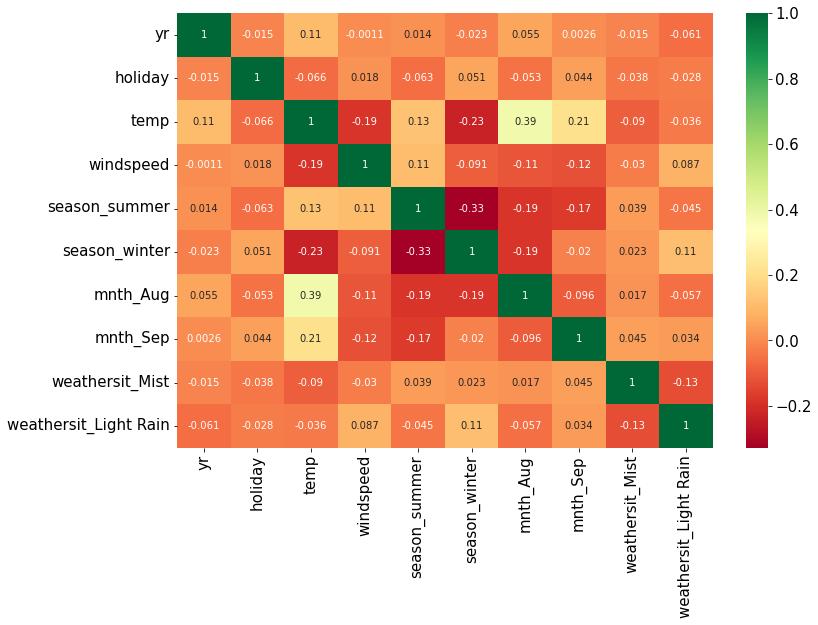

In [402]:
# check which variable has high correlation with temp
plt.figure(figsize=(12,8))
sns.heatmap(X_train_rfe.corr(),annot=True,cmap="RdYlGn")

so mnth_Aug has high correlation with temp.so we decided to remove it

# Model 8

In [403]:
X_train_rfe=X_train_rfe.drop('mnth_Aug',axis=1)

In [404]:
X_train_sm = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train, X_train_sm).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          1.37e-186
Time:                        16:23:23   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

In [405]:
X=X_train_rfe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
print(vif.sort_values(by = "VIF", ascending = False))

                Features   VIF
2                   temp  3.68
3              windspeed  3.05
0                     yr  2.00
4          season_summer  1.56
7        weathersit_Mist  1.48
5          season_winter  1.38
6               mnth_Sep  1.20
8  weathersit_Light Rain  1.08
1                holiday  1.03


**The p-values for each predictor in this model appear to be significant.Also VIF of all variables are below 5. As long as test data metrics are close to this number, we will consider this to be our final model.**

## Residual Analysis of the train data

In [406]:
#predicted value of y_train
y_train_pred = lm8.predict(X_train_sm)

In [407]:
# residual calculation/error calculation
res=y_train-y_train_pred

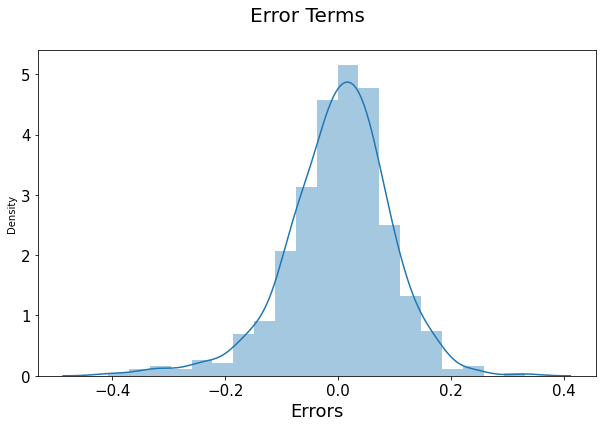

In [408]:
# Plot the histogram of the error terms to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression)
fig = plt.figure(figsize=(10,6))
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)              
plt.xlabel('Errors', fontsize = 18)  
plt.show()

Text(0.5, 0, 'predicted value')

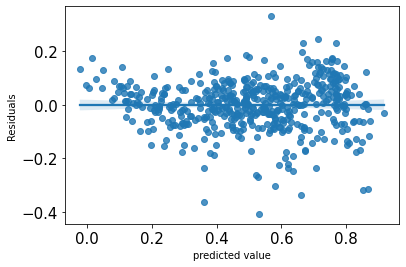

In [409]:
# check indepedence of errors
sns.regplot(y_train_pred,res)
plt.ylabel("Residuals")
plt.xlabel("predicted value")
Plt.show()

**so our model satisifes assumptions of linear regression.**

In [410]:
# R-squared calculation
from sklearn.metrics import r2_score

r2_score(y_train, y_train_pred)

0.8308378040041673

## Model Evaluation using Test data

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions on test data validate our model

#### Applying the scaling on the test sets

In [411]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

In [412]:
# scaling on test_data.here we use only transform 
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [413]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.639269    0.558941    0.532991    0.638508   
std      0.500722    0.188034    0.481313    0.233698    0.217888    0.148974   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.354650    0.344751    0.527265   
50%      0.000000    0.000000    1.000000    0.558691    0.549198    0.627737   
75%      1.000000    0.000000    1.000000    0.759096    0.714132    0.743928   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt  season_summer  season_fall  season_winter  \
count  219.000000  219.000000     219.000000   219.000000     219.000000   
mean     0.313350    0.520592       0.264840     0.246575       0.232877   
std      0.159947    0.218435       0.442259     0.432005       0.423633   
min     -0.042808    0.048205       0.000000     0.000000       0.000000   
25%      0.198517    0.377531       0.000000     0.000000       0.000000   
50%      0.299459    0.524275       0.000000     0.000000       0.000000   
75%      0.403048    0.672745       1.000000     0.000000       0.000000   
max      0.807474    0.963300       1.000000     1.000000       1.000000   

         mnth_feb  mnth_march    mnth_Apr    mnth_May   mnth_June   mnth_July  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.100457    0.054795    0.091324    0.086758    0.095890    0.105023   
std      0.301297    0.228100    0.288730    0.282125    0.295115    0.307285   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         mnth_Aug    mnth_Sep    mnth_Oct    mnth_Nov    mnth_Dec  \
count  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.059361    0.086758    0.082192    0.073059    0.086758   
std      0.236840    0.282125    0.275286    0.260830    0.282125   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       weekday_mon  weekday_tue  weekday_wed  weekday_thu  weekday_fri  \
count   219.000000   219.000000   219.000000   219.000000   219.000000   
mean      0.118721     0.123288     0.155251     0.141553     0.132420   
std       0.324202     0.329520     0.362974     0.349389     0.339723   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_sat  weathersit_Mist  weathersit_Light Rain  
count   219.000000       219.000000             219.000000  
mean      0.173516         0.319635               0.027397  
std       0.379560         0.467403               0.163612  
min       0.000000         0.000000               0.000000  
25%       0.000000         0.000000               0.000000  
50%       0.000000         0.000000               0.000000  
75%       0.000000         1.000000               0.000000  
max       1.000000         1.000000               1.000000

#### Dividing into X_test and y_test

In [414]:
y_test = df_test.pop('cnt')
X_test = df_test


In [415]:
X_test.shape

(219, 29)

In [416]:
#create X test with columns from our model.
# add constant variable to test dataframe
X_test = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test)

In [417]:
#check df
X_test_new

const  yr  holiday      temp  windspeed  season_summer  season_winter  \
184    1.0   0        1  0.831783   0.084219              0              0   
535    1.0   1        0  0.901354   0.153728              1              0   
299    1.0   0        0  0.511964   0.334206              0              1   
221    1.0   0        0  0.881625   0.339570              0              0   
152    1.0   0        0  0.817246   0.537414              1              0   
..     ...  ..      ...       ...        ...            ...            ...   
400    1.0   1        0  0.257562   0.287411              0              0   
702    1.0   1        0  0.519232   0.283397              0              1   
127    1.0   0        0  0.584649   0.069510              1              0   
640    1.0   1        0  0.745598   0.052115              0              1   
72     1.0   0        0  0.331557   0.203418              0              0   

     mnth_Sep  weathersit_Mist  weathersit_Light Rain  
184         0                1                      0  
535         0                0                      0  
299         0                1                      0  
221         0                0                      0  
152         0                0                      0  
..        ...              ...                    ...  
400         0                1                      0  
702         0                0                      0  
127         0                0                      0  
640         0                1                      0  
72          0                0                      0  

[219 rows x 10 columns]

In [418]:
# Making predictions using the Eighth model
y_test_pred = lm8.predict(X_test_new)

In [419]:
# calculating residuals
res=y_test-y_test_pred

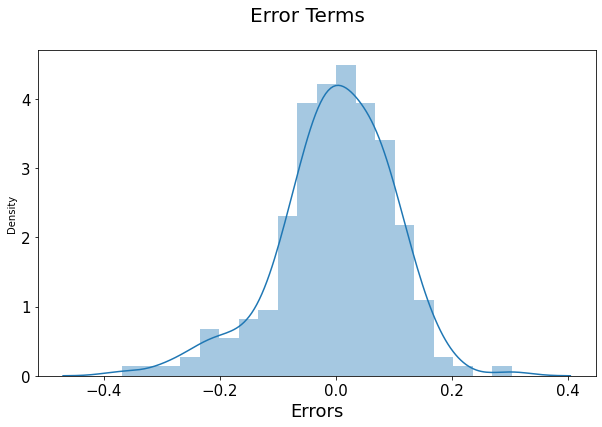

In [420]:
# Plot the histogram of the error terms 
fig = plt.figure(figsize=(10,6))
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)              
plt.xlabel('Errors', fontsize = 18)  
plt.show()

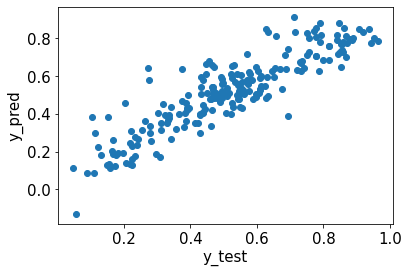

In [421]:
# Plot y_test and y_pred
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 18)               
plt.xlabel('y_test', fontsize = 15)                          
plt.ylabel('y_pred', fontsize = 15) 
plt.show()

### R-squared value for test data

In [422]:
r2_score(y_test,y_test_pred)

0.7938290016640652

### Adjusted R-Squared value

In [423]:
# n is number of rows in X
r2= 0.7938290016640652
n = X_test.shape[0]


# Number of predictors p
p =X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(((1-r2)*(n-1))/(n-p-1))
adjusted_r2

0.7849508247022308

As R squared and Adj R squared value of train and test are similar and within in limits,we can consider our model as a good model

### INSIGHTS:

We can see that the equation of our best fitted line is:

cnt=0.2328xyr-0.0992xholiday+0.5480xtemp-0.1533xwindspeed+0.0868xseason_summer+0.1306xseason_winter+0.1011xmnth_Sep-0.0797xweathersit_Mist-0.2838xweathersit_Light

**Observations:**

- Temp variable has highest coefficient in our final model.ie it is highly significant variable.A unit increase in temp will increase rental demand by 0.5480 units.So company should consider this variable impact
- yr has a positive impact on rental demand.so year on year demand is increasing and they can be sure that this year also demand will be high
- winter season will positively impact the demand in rentals so company should make more bikes available during winter.summer season is also a favorable season
- company should make more bikes available on stock during september month as this month is having high demand
- weather conditions like misty and light rainy/snowy and windspeed are negatively effecting rental bikes demand.So company can use this time effectively for maintanence purpose
- Holidays have negative coefficients which shows rental demand will be low on holidays and compnay should focus on working days for rental purpose